# ML Course Project

## Task

- Classify 'tf_flowers' dataset (from tfds with 70% training split) using transfer learning on both mobilenet_v2 and inception_v3.
- Compare results both networks:
  - training/validation accuracy and loss.
  - confusion matrix for the output.

## Grades:

- 10  Loading data
- 10  Loading models
- 20  Training
- 10  Visualizing train/validation accuracy and loss
- 30  confusion matrix

# The solution will be divided into 3 sections 
## Section1 ---->  Mobilenet_v4 with tf_flower
## Section2 ---->  Inception_v3 with tf_flower
## Section3 ---->  Comparssion and conclussion 


In [278]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import numpy as np
import PIL.Image as Image

In [279]:
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
IMAGE_RES = 224
model = tf.keras.Sequential([
    hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))
])


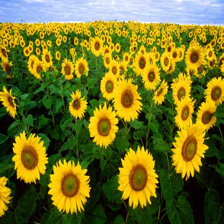

In [280]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('f_.jpg','https://cdn.britannica.com/84/73184-004-E5A450B5/Sunflower-field-Fargo-North-Dakota.jpg')
img = Image.open(img).resize((IMAGE_RES, IMAGE_RES))
img 

In [281]:
img = np.array(img)/255.0
img.shape

(224, 224, 3)

In [282]:
result = model.predict(img[np.newaxis, ...])
result.shape

(1, 1001)

In [283]:
print (img.shape)
print (img[np.newaxis, ...].shape)
print (np.array([img]).shape)

(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [284]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

986

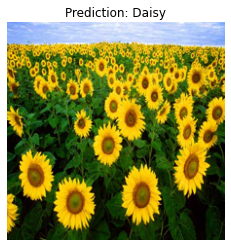

In [285]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [286]:
image_batch, label_batch = next(iter(train_batches.take(1)))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

result_batch = model.predict(image_batch)

predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['daisy', 'vase', 'pug', 'spider web', 'daisy', 'bee',
       'red-backed sandpiper', 'studio couch', 'daisy',
       'Bedlington terrier', "yellow lady's slipper", 'daisy', 'daisy',
       'packet', 'daisy', 'daisy', 'conch', 'daisy', 'daisy',
       'worm fence', 'daisy', 'daisy', 'quill', 'bee', 'quill', 'daisy',
       'jinrikisha', 'daisy', 'park bench', 'daisy', 'sea urchin',
       'African grey'], dtype='<U30')

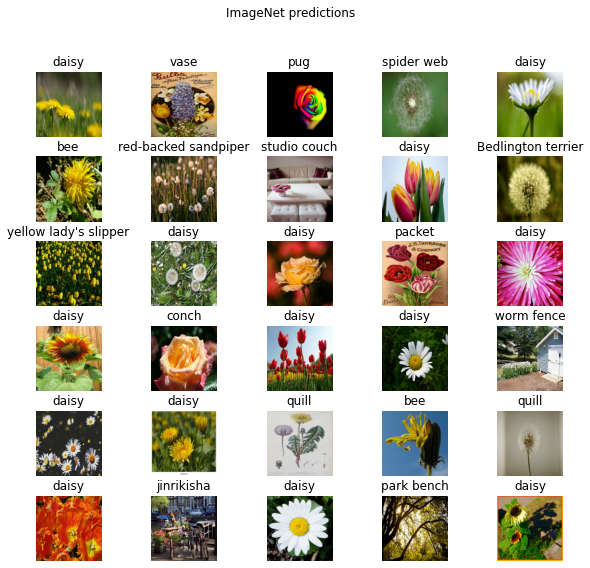

In [287]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

In [288]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

In [289]:
feature_batch = feature_extractor(image_batch)
print(feature_batch.shape)

(32, 1280)


In [290]:
feature_extractor.trainable = False

In [291]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(5)
])

model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_28 (KerasLayer)  (None, 1280)              2257984   
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [292]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 5
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/5
81/81 [==============================] - 6s 56ms/step - loss: 0.8028 - accuracy: 0.7046 - val_loss: 0.4496 - val_accuracy: 0.8565
Epoch 2/5
81/81 [==============================] - 4s 51ms/step - loss: 0.3842 - accuracy: 0.8747 - val_loss: 0.3536 - val_accuracy: 0.8955
Epoch 3/5
81/81 [==============================] - 4s 51ms/step - loss: 0.2996 - accuracy: 0.9031 - val_loss: 0.3273 - val_accuracy: 0.8965
Epoch 4/5
81/81 [==============================] - 4s 51ms/step - loss: 0.2495 - accuracy: 0.9221 - val_loss: 0.3078 - val_accuracy: 0.8983
Epoch 5/5
81/81 [==============================] - 4s 51ms/step - loss: 0.2155 - accuracy: 0.9369 - val_loss: 0.2943 - val_accuracy: 0.9055


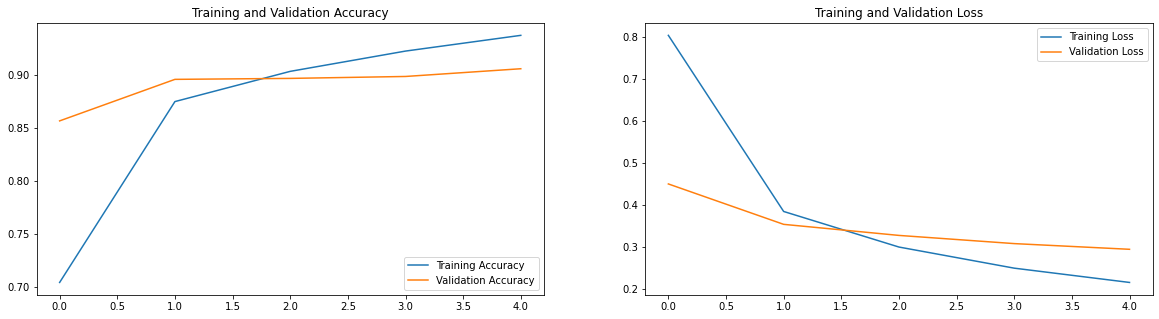

In [294]:
acc=acc_M = history.history['accuracy']
val_acc=val_acc_M = history.history['val_accuracy']

loss=loss_M = history.history['loss']
val_loss=val_loss_M = history.history['val_loss']

epochs_range=epochs_range_M = range(EPOCHS)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [295]:
class_names = np.array(info.features['label'].names)
class_names


array(['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'],
      dtype='<U10')

In [296]:
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

array(['dandelion', 'roses', 'roses', 'dandelion', 'daisy', 'dandelion',
       'dandelion', 'roses', 'tulips', 'dandelion', 'tulips', 'dandelion',
       'roses', 'roses', 'dandelion', 'sunflowers', 'roses', 'tulips',
       'daisy', 'tulips', 'daisy', 'dandelion', 'dandelion', 'tulips',
       'dandelion', 'tulips', 'tulips', 'daisy', 'daisy', 'sunflowers',
       'dandelion', 'dandelion'], dtype='<U10')

In [297]:
print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:  [0 2 4 0 1 0 0 4 2 0 2 0 4 2 4 3 4 2 1 1 1 0 0 0 0 2 2 1 2 3 0 0]
Predicted labels:  [0 4 4 0 1 0 0 4 2 0 2 0 4 4 0 3 4 2 1 2 1 0 0 2 0 2 2 1 1 3 0 0]


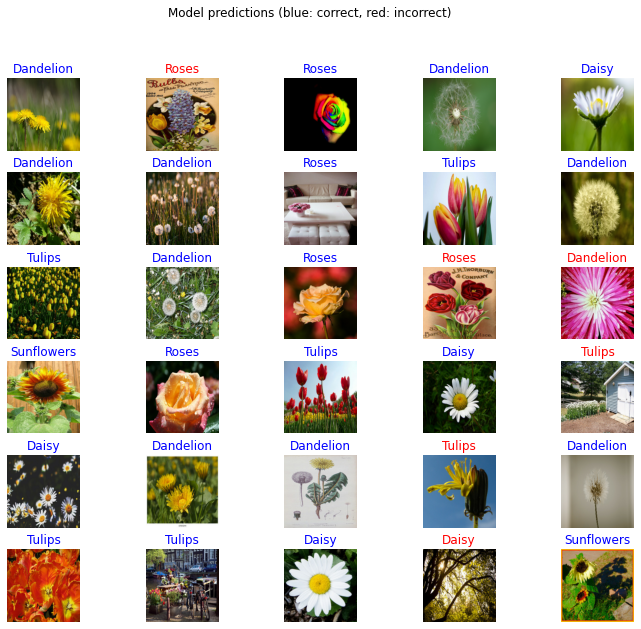

In [298]:
plt.figure(figsize=(12,10))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

#  SECTION2 inception_v3

In [299]:
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/inception_v3/classification/4"
IMAGE_RES = 224
model = tf.keras.Sequential([
    hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))
])


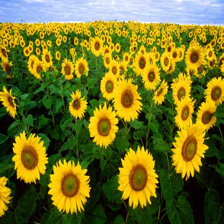

In [300]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('f_.jpg','https://cdn.britannica.com/84/73184-004-E5A450B5/Sunflower-field-Fargo-North-Dakota.jpg')
img = Image.open(img).resize((IMAGE_RES, IMAGE_RES))
img 

In [301]:
img = np.array(img)/255.0
img.shape


(224, 224, 3)

In [302]:
result = model.predict(img[np.newaxis, ...])
result.shape

(1, 1001)

In [303]:
print (img.shape)
print (img[np.newaxis, ...].shape)
print (np.array([img]).shape)

(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [304]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

986

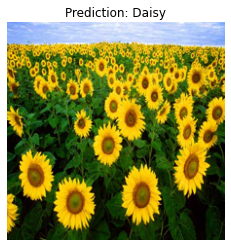

In [305]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [306]:
image_batch, label_batch = next(iter(train_batches.take(1)))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

result_batch = model.predict(image_batch)

predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['daisy', 'rapeseed', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'daisy', 'hamper', 'vase', 'bee', 'jellyfish', 'grasshopper',
       'Boston bull', 'daisy', 'sea urchin', 'sea urchin', 'bee',
       'cardoon', 'sea urchin', 'padlock', 'leafhopper', 'head cabbage',
       'cardoon', 'cabbage butterfly', 'daisy', 'vizsla', 'daisy',
       'earthstar', 'gown', 'vase', 'mobile home'], dtype='<U30')

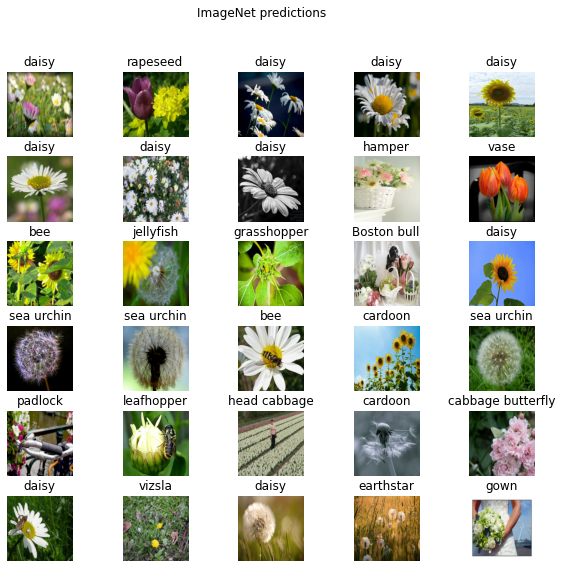

In [307]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

In [308]:
URL = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

In [309]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(5)
])

model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_30 (KerasLayer)  (None, 2048)              21802784  
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 10245     
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________


In [310]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 5
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/5
81/81 [==============================] - 12s 114ms/step - loss: 0.7688 - accuracy: 0.7213 - val_loss: 0.4792 - val_accuracy: 0.8338
Epoch 2/5
81/81 [==============================] - 8s 105ms/step - loss: 0.4222 - accuracy: 0.8533 - val_loss: 0.4400 - val_accuracy: 0.8411
Epoch 3/5
81/81 [==============================] - 8s 105ms/step - loss: 0.3373 - accuracy: 0.8805 - val_loss: 0.3770 - val_accuracy: 0.8656
Epoch 4/5
81/81 [==============================] - 9s 106ms/step - loss: 0.2772 - accuracy: 0.9081 - val_loss: 0.3699 - val_accuracy: 0.8683
Epoch 5/5
81/81 [==============================] - 9s 106ms/step - loss: 0.2476 - accuracy: 0.9245 - val_loss: 0.3681 - val_accuracy: 0.8665


Text(0.5, 1.0, 'MOBIL_NET Training and Validation Loss')

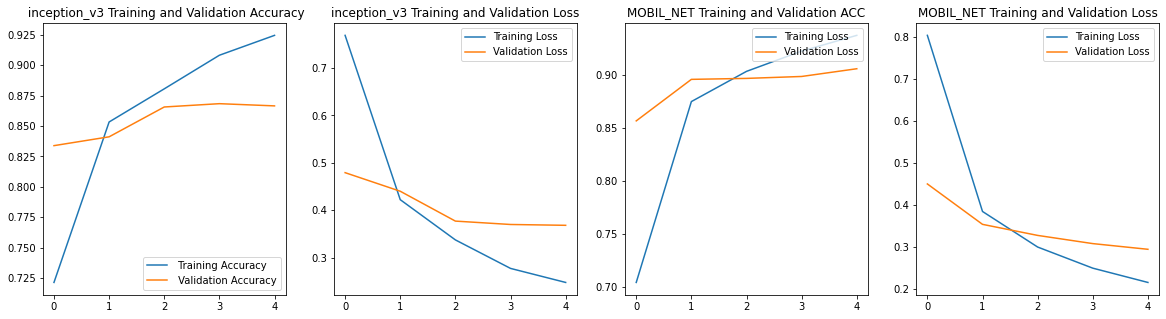

In [315]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)

plt.plot(epochs_range, acc, label=' Training Accuracy')
plt.plot(epochs_range, val_acc, label=' Validation Accuracy')
plt.legend(loc='lower right')
plt.title(' inception_v3 Training and Validation Accuracy')

plt.subplot(1, 4, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('inception_v3 Training and Validation Loss')
#plt.show()
plt.subplot(1, 4, 3)
plt.plot(epochs_range, acc_M, label='Training Loss' )
plt.plot(epochs_range, val_acc_M, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('MOBIL_NET Training and Validation ACC')


plt.subplot(1, 4, 4)
plt.plot(epochs_range_M, loss_M, label='Training Loss')
plt.plot(epochs_range_M, val_loss_M, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('MOBIL_NET Training and Validation Loss')


#plt.show()

# AS Shown mobilenet accuracy is higher than inception 3

In [243]:
class_names = np.array(info.features['label'].names)
class_names

array(['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'],
      dtype='<U10')

In [244]:
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

array(['roses', 'dandelion', 'dandelion', 'roses', 'roses', 'dandelion',
       'roses', 'dandelion', 'roses', 'tulips', 'dandelion', 'sunflowers',
       'tulips', 'roses', 'tulips', 'sunflowers', 'sunflowers', 'roses',
       'tulips', 'dandelion', 'dandelion', 'dandelion', 'tulips',
       'sunflowers', 'daisy', 'sunflowers', 'tulips', 'sunflowers',
       'tulips', 'dandelion', 'roses', 'daisy'], dtype='<U10')

In [245]:
print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:  [4 0 0 4 4 0 4 0 4 2 0 2 4 4 2 3 3 4 2 0 0 0 2 3 1 3 2 3 2 0 4 1]
Predicted labels:  [4 0 0 4 4 0 4 0 4 2 0 3 2 4 2 3 3 4 2 0 0 0 2 3 1 3 2 3 2 0 4 1]


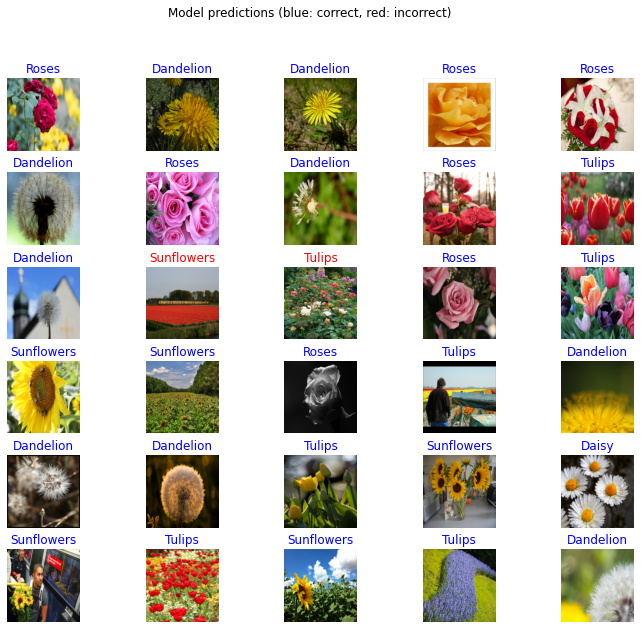

In [246]:
plt.figure(figsize=(12,10))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")